In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,NaN,1.0,2.0,0.0,0.0,NaN,3.0,0.0,3.0,0.0,...,0.0,NaN,0.0,0.0,0.0,2.0,2.0,2.0,NaN,NaN
2,2.0,NaN,1.0,0.0,0.0,0.0,3.0,0.0,NaN,0.0,...,0.0,0.0,0.0,2.0,0.0,NaN,3.0,2.0,0.0,7.0
3,2.0,2.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,...,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,7.0
4,2.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,2.0,2.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,70.0
354,2.0,NaN,2.0,0.0,0.0,NaN,0.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
355,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,NaN
356,2.0,NaN,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	18
float64		column 2	69
float64		column 3	34
float64		column 4	51
float64		column 5	34
float64		column 6	52
float64		column 7	34
float64		column 8	17
float64		column 9	34
float64		column 10	34
float64		column 11	17
float64		column 12	35
float64		column 13	51
float64		column 14	35
float64		column 15	34
float64		column 16	35
float64		column 17	17
float64		column 18	34
float64		column 19	18
float64		column 20	34
float64		column 21	69
int64		column 22	0
float64		column 23	35
float64		column 24	69
float64		column 25	18
float64		column 26	35
float64		column 27	35
float64		column 28	17
float64		column 29	35
float64		column 30	17
float64		column 31	17
float64		column 32	52
float64		column 33	35
float64		column 34	52


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,340.000000,289.000000,324.000000,307.000000,324.000000,306.000000,324.000000,341.000000,324.000000,324.000000,...,340.000000,323.000000,323.000000,341.000000,323.000000,341.000000,341.000000,306.000000,323.000000,306.000000
mean,2.064706,1.858131,1.604938,1.328990,0.598765,0.405229,0.166667,0.363636,0.598765,0.484568,...,0.391176,0.427245,0.461300,0.944282,0.442724,0.096774,0.120235,1.908497,0.523220,36.202614
std,0.648521,0.637877,0.864562,1.081291,0.868862,0.929924,0.575560,0.820525,0.985718,0.881391,...,0.853543,0.828529,0.952711,1.119271,0.945224,0.433204,0.503138,0.641305,1.075671,14.599735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,25.250000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.500000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,47.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

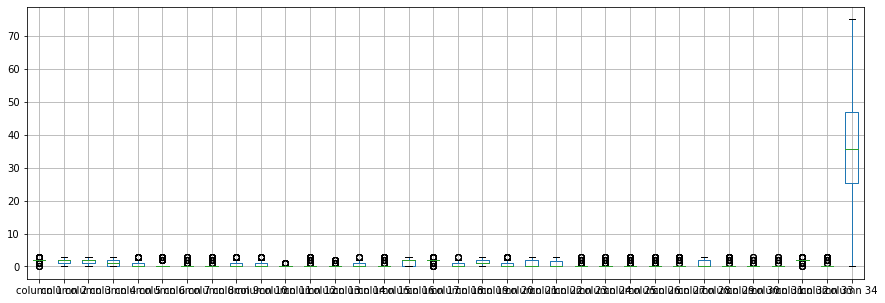

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.064706
column 2      1.858131
column 3      1.604938
column 4      1.328990
column 5      0.598765
column 6      0.405229
column 7      0.166667
column 8      0.363636
column 9      0.598765
column 10     0.484568
column 11     0.123167
column 12     0.371517
column 13     0.146580
column 14     0.513932
column 15     0.293210
column 16     1.386997
column 17     1.970674
column 18     0.487654
column 19     1.279412
column 20     0.623457
column 21     0.896194
column 22     0.642458
column 23     0.312693
column 24     0.266436
column 25     0.391176
column 26     0.427245
column 27     0.461300
column 28     0.944282
column 29     0.442724
column 30     0.096774
column 31     0.120235
column 32     1.908497
column 33     0.523220
column 34    36.202614
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.409421,0.192427,-0.075997,-0.016174,0.026810,-0.109831,-0.060212,0.125019,0.150883,...,-0.028496,0.154251,-0.005023,0.053664,-0.034092,0.020864,0.033795,0.094960,-0.024702,0.029894
column 2,0.409421,1.000000,0.314582,-0.094309,-0.005445,-0.074606,-0.093141,-0.007589,0.212083,0.228767,...,-0.037659,0.206112,-0.066842,0.014200,-0.057674,-0.013191,-0.015845,0.058539,-0.083202,0.074879
column 3,0.192427,0.314582,1.000000,-0.110519,0.181148,0.286278,-0.176837,0.278111,0.315333,0.249451,...,0.269785,0.309219,0.288700,-0.244087,0.244768,-0.050949,-0.115430,0.083231,0.260619,0.132386
column 4,-0.075997,-0.094309,-0.110519,1.000000,0.248858,0.330520,-0.149688,0.334874,-0.349019,-0.196225,...,0.346670,-0.175415,0.361735,-0.000141,0.335372,-0.159587,-0.193174,0.026006,0.341835,0.048028
column 5,-0.016174,-0.005445,0.181148,0.248858,1.000000,0.357253,-0.152729,0.374030,-0.051001,-0.055807,...,0.368020,0.023985,0.334194,0.011164,0.373859,-0.137683,-0.160366,0.083237,0.357295,0.096381
column 6,0.026810,-0.074606,0.286278,0.330520,0.357253,1.000000,-0.133097,0.847881,-0.266002,-0.242001,...,0.885691,-0.116557,0.916948,0.074809,0.888777,-0.096756,-0.105950,0.200653,0.912768,0.087069
column 7,-0.109831,-0.093141,-0.176837,-0.149688,-0.152729,-0.133097,1.000000,-0.131512,0.212369,-0.025561,...,-0.113001,-0.151578,-0.144313,0.015290,-0.135142,0.759175,0.858466,-0.153906,-0.136974,-0.324310
column 8,-0.060212,-0.007589,0.278111,0.334874,0.374030,0.847881,-0.131512,1.000000,-0.285538,-0.256081,...,0.889513,-0.111363,0.897995,0.084204,0.874752,-0.078937,-0.109277,0.249470,0.894598,0.112063
column 9,0.125019,0.212083,0.315333,-0.349019,-0.051001,-0.266002,0.212369,-0.285538,1.000000,0.664775,...,-0.268592,0.511756,-0.301514,-0.414932,-0.280329,0.230860,0.261573,-0.171062,-0.268951,-0.076629
column 10,0.150883,0.228767,0.249451,-0.196225,-0.055807,-0.242001,-0.025561,-0.256081,0.664775,1.000000,...,-0.252951,0.426495,-0.248532,-0.404099,-0.254943,-0.039543,-0.018625,-0.039965,-0.253031,0.011323


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+34,34+34+34,34+34+34+34,34+34+34+34+34,34+34+34+34+34+34,34+34+34+34+34+34+34,34+34+34+34+34+34+34+34,34+34+34+34+34+34+34,34+34+34+34+34+34,34+34+34+34+34,34+34+34+34,34+34+34,34+34,34], vae_layer = False, seed = 34)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 66.23391636935148
Epoch: 1 , loss: 65.8550687269731
Epoch: 2 , loss: 66.28256728432395
Epoch: 3 , loss: 65.74916059320623
Epoch: 4 , loss: 66.2079981023615
Epoch: 5 , loss: 65.73263185674494
Epoch: 6 , loss: 64.5033406344327
Epoch: 7 , loss: 62.15168016607111
Epoch: 8 , loss: 61.1767411665483
Epoch: 9 , loss: 60.228710347955875
Epoch: 10 , loss: 59.98223720897328
Epoch: 11 , loss: 59.32375907897949
Epoch: 12 , loss: 58.91351127624512
Epoch: 13 , loss: 58.25364268909801
Epoch: 14 , loss: 58.22259296070445
Epoch: 15 , loss: 57.95100784301758
Epoch: 16 , loss: 57.68145977367055
Epoch: 17 , loss: 57.67035831104625
Epoch: 18 , loss: 57.28772406144576
Epoch: 19 , loss: 56.7838020324707
Epoch: 20 , loss: 56.81889880787242
Epoch: 21 , loss: 56.805781451138586
Epoch: 22 , loss: 56.19827547940341
Epoch: 23 , loss: 56.30994501980868
Epoch: 24 , loss: 56.09159677678888
Epoch: 25 , loss: 55.98694523898038
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.639262
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      0.007912
column 8      0.000000
column 9      3.000000
column 10     0.504910
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.090660
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,1.583507,0.000000,0.0,0.0,0.0,0.491246,0.0,0.0,0.000000,0.0,...,0.000000,0.432727,0.0,0.0,0.0,0.000000,0.0,0.000000,0.735047,30.589405
2,0.000000,0.070376,0.0,0.0,0.0,0.000000,0.0,0.0,-1.453653,0.0,...,0.000000,0.000000,0.0,0.0,0.0,-3.018388,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.242815,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
354,0.000000,-2.224347,0.0,0.0,0.0,0.082568,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,-57.894394
355,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.223333,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,-47.327616
356,0.000000,-0.116555,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,-0.039378,0.000000,-58.024940


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(186.6592596016587, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.24622875231444735

In [18]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      0.000000
column 4      0.771559
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13    -0.002377
column 14     0.000000
column 15     2.000000
column 16     1.013443
column 17     2.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     3.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     2.000000
column 33     0.000000
column 34    22.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.000000,1.000000,1.0,1.0,1.0,0.000000,0.0,0.0,2.000000,2.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,2.000000,0.000000
1,2.583507,1.000000,2.0,0.0,0.0,0.491246,3.0,0.0,3.000000,0.0,...,0.000000,0.432727,0.0,0.0,0.0,2.000000,2.0,2.000000,0.735047,37.589405
2,2.000000,2.070376,1.0,0.0,0.0,0.000000,3.0,0.0,0.546347,0.0,...,0.000000,0.000000,0.0,2.0,0.0,-0.018388,3.0,2.000000,0.000000,7.000000
3,2.000000,2.000000,2.0,1.0,0.0,0.000000,2.0,0.0,2.000000,2.0,...,0.000000,0.000000,0.0,2.0,0.0,2.000000,2.0,2.000000,0.000000,7.000000
4,2.000000,2.000000,1.0,0.0,0.0,0.000000,2.0,0.0,2.000000,0.0,...,0.000000,0.000000,0.0,3.0,0.0,2.000000,2.0,2.000000,0.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.000000,2.000000,0.0,2.0,1.0,0.000000,0.0,0.0,0.000000,0.0,...,0.242815,0.000000,0.0,3.0,0.0,0.000000,0.0,3.000000,0.000000,70.000000
354,2.000000,0.775653,2.0,0.0,0.0,0.082568,0.0,0.0,3.000000,2.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,12.105606
355,2.000000,2.000000,2.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.223333,0.000000,0.0,2.0,0.0,0.000000,0.0,2.000000,0.000000,22.672384
356,2.000000,0.883445,0.0,3.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.960622,0.000000,11.975060


In [20]:
imputations[-1].to_excel("DERM_NG_10(imp).xlsx", index=False, header=False)